

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<ul>
    <li> ScheduledDay: tells us on what day the patient set up their appointment.</li>
    <li> Neighborhood: indicates the location of the hospital.</li>
<li>Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program.</li>
    <li>Patient ID: tells us the the identity of the patient.</li>
<li>AppointmentID: it's a unique identifier for each appointment.</li>
    <li> Gender: tells us whether the person is male denoted by 'M' or female denoted by 'F'.</li>
    <li> AppointmentDay: tells us the day of the appointment.</li>
<li>Age: indicates the age of the person.</li>
    <li>Scholarship: tells us whether the person had scholarship.</li>
<li>Hipertension: indicate whether the person have hipertension.</li>
    <li> Diabetes: indicate whether the person have diabetes.</li>
    <li> Handcap: indicates whether the person is physically challenged.</li>
<li>Alcoholism: indicates whether the person is alcoholic.</li>
    <li>SMS_received: tells us whether the person received a text message about the appointment.</li>
<li>The last column('No_show'): it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>


### Question(s) for Analysis
> This analysis looks into those factors that are important for us to know in order to predict if a patient will show up for their scheduled appointment?

<ul>
<li> How many patients showed up for their appointment and how many did not?</li>
    
<li> Is there any relationship between Age and Showed?</li>
    
<li>Is there any relationship between Neighbourhood and Showed?</li>
    
<li>Is there any relationship between Scholarship and Showed?</li>
    
<li>What is the relationship between Gender and Showed?</li>
    
<li> What effect does AppointmentDay have on Showed?</li>
    
<li> Does SMS received have effect on patient that Showed for their appointment?</li>

</ul>

In [156]:
# import necessary packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 



In [157]:
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [158]:
#Let's check the number of rows, colums, data types and the name of each column of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>  There are 110527 rows and 14 columns in the dataset. I am more concerned about the '**'No-show'** column as it is the target variable. I will like to rename it to **Showed** because it is in negative form and also reverse the values of the column by changing **No** to **True** and **Yes** to **False.**



In [159]:
# changing the name of the column from No-show to Showed to be in positive form

df.rename(columns ={'No-show': 'Showed'}, inplace= True)

# reversing the entries of the column 

df['Showed'] = df['Showed'].map({'No': True, 'Yes': False})

In [160]:
# checking if the changes has taken effect
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,True
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,True
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,False
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,False
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,True
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,True


>  The ScheduledDay and the AppointmentDay are regarded as object instead of datetime, so I will need to change it to datetime.


In [161]:
#Changing the ScheduledDay and AppointmentDay datatype from object to datetime

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [113]:
#Checking the features of the dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The minimum age is -1 which is and error in the data, so I will be dropping the rows containing it

In [162]:
#Dropping rows with -1

df =df[df.Age > 0]

In [118]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis






### Research Question 1 (How many patient showed up for their appointmnet and how many did not?)

In [163]:
#Let's see the numbers of those that showed up and those that didnt

df['Showed'].value_counts()

True     85307
False    21680
Name: Showed, dtype: int64

> This shows that more than 80% of the patients showed up for their appointment

In [120]:
#let's categorise both the true and false and see the visualization


#patients that showed up for their appointment 

Show = df.Showed == True 

#patients that did not show up for their appointmnet

no_show = df.Showed == False 



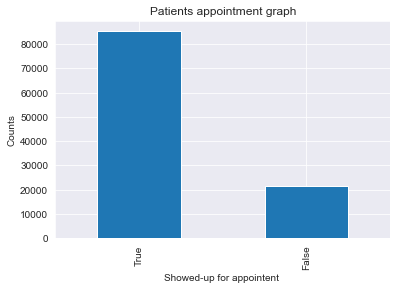

In [121]:
#Visualization to see the number of patient that showed up for their appointment and those that did not using bar chart

df['Showed'].value_counts().plot(kind='bar') #plotting patients that showed up and those that did not show up
plt.title('Patients appointment graph') #title of the graph
plt.xlabel('Showed-up for appointent ') #the x-axis label
plt.ylabel('Counts');    #the y-axis label

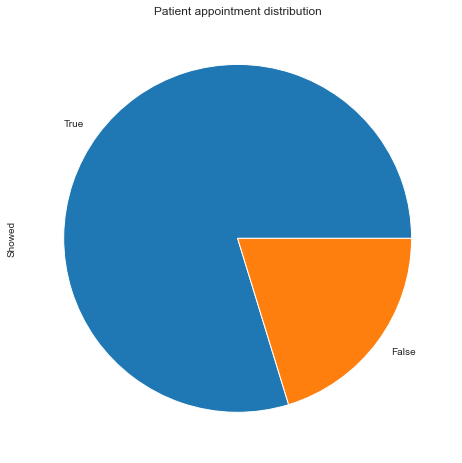

In [164]:
#Let's see the distribution of patients that showed up and those that did not show up using pie chart 

df['Showed'].value_counts().plot(kind='pie', figsize =(8,8));
plt.title('Patient appointment distribution');


### Research Question 2  (Is there any relationship between Age and Showed?)

### Age

>  Let's see the effect Age have on whether patient showed up or not. 

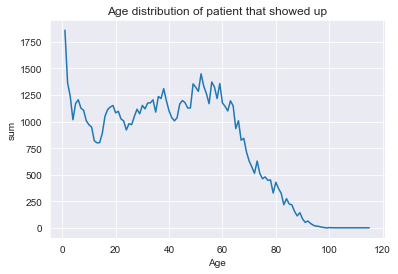

In [33]:
#Distribution of ages of patient that Showed up for their appointment

#Let's define another function df_new (a series object) which grouped the ages of patients that showed 
df_new = df.groupby('Age').Showed

#Let's summed up the series object
df_new.sum()

#Let's plot the series object and see what it look like
df_new.sum().plot()

#Let's give our graph title and label the axes
plt.title('Age distribution of patient that showed up')
plt.xlabel('Age')
plt.ylabel('sum');

> The histogram shows that the number of appointments varies by age. The maximum appointments are for infants. There is a drop and then a spike at around the age of 50. Finally, as the age progresses less and less people set up appointments.

### Research question 3(Is there any relationship between Neighbourhood and Showed?)

>  There are several neighbourhood, let's see the effect those neighbourhood have on whether patient will show up for their appointment. 

In [16]:
#Let's see the number of patients from each neighbourhood


df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7586
MARIA ORTIZ                    5563
RESISTÊNCIA                    4235
JARDIM DA PENHA                3851
ITARARÉ                        3412
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

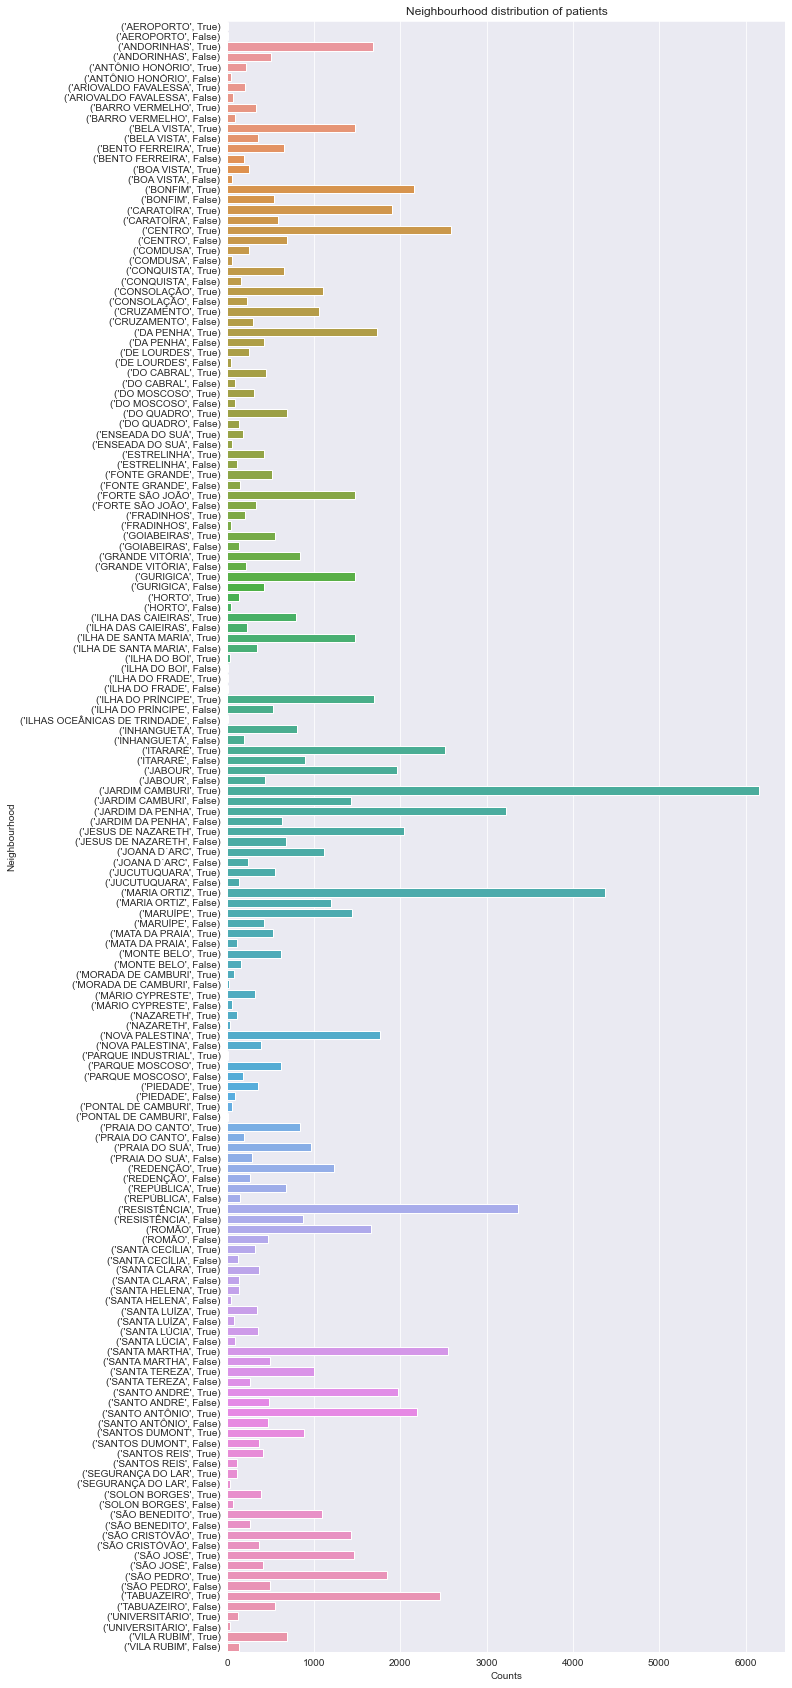

In [37]:
#Distribution of Neighbourhood of patients that Showed up for their appointment

#Let's define another function df_hood that grouped patient according to their neighbourhood

df_hood = df.groupby('Neighbourhood').Showed.value_counts()

#Let's see the barplot of the function df_hood

sns.barplot(x= df_hood.values, y= df_hood.index)

#the size of the plot
plt.gcf().set_size_inches(10,30)


#the title of the plot and axes
plt.title('Neighbourhood distribution of patients')

plt.xlabel('Counts')   # x-axis
plt.ylabel('Neighbourhood');  #y-axis

>  The neighborhood data varied alot. Jardim Camburi has very high number of appointments while there are some neighborhoods that have less than 35 appointments.

### Research question 4 ( Is there any relationship between Scholarship and Showed? )

>  Let's see if the Bolsa Familia program have effect on whether patients shows up for their appointment. 

In [207]:
#Distribution of Scholarship effect on patients that Showed up for their appointment

#Let's plot a double bar chats to group scholarship for both show and no_show for patients appointment

#Let's define a function ('my_function1') to plot the chart

def my_function1():
#Bar chart for Patients that Showed up

    df.Scholarship[Show].value_counts().plot(kind='bar', alpha =0.5, color='blue',  label='Show', figsize=(20,10))

#Bar chart for patients that did not show up

    df.Scholarship[no_show].value_counts().plot(kind='bar', alpha =0.5, color='orange', label='no_show', figsize=(20,10) )



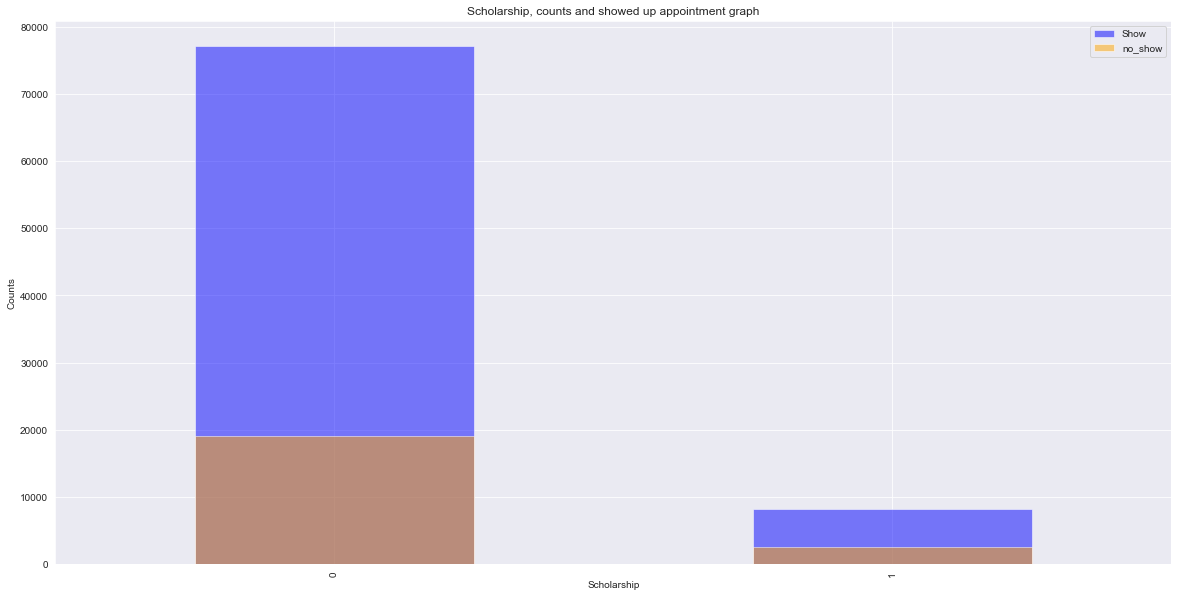

In [208]:
# Let's call the function to plot the chart

my_function1()

#Chart title and label

plt.title('Scholarship, counts and showed up appointment graph')

plt.xlabel('Scholarship')

plt.ylabel('Counts')

#To describe parts of the chart
plt.legend();

> The graph shows that scholarship does not have effect on number of people that showed up for their appointment as people without scholarship tends to show more for their appointments.

### Research question 5 ( What is the relationship between Gender and Showed? ) 

>  Let's see  the effect of gender on whether patients shows up for their appointment. 

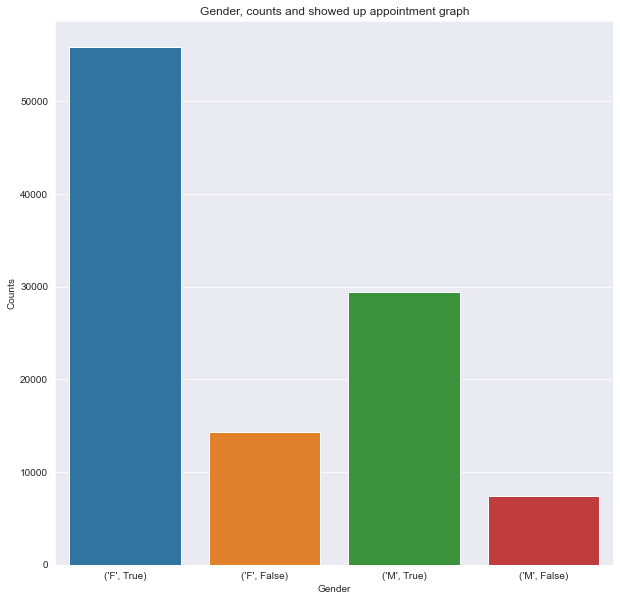

In [123]:
#Distribution of Scholarship effect on patients that Showed up for their appointment

#Let's define a function df_gender which grouped patient that showed up by gender

df_gender = df.groupby('Gender').Showed.value_counts()

#Let's have a barplot of the function df_gender

sns.barplot(x= df_gender.index, y= df_gender.values)

#setting the plot size

plt.gcf().set_size_inches(10,10)

#setting plot title and axes

plt.title('Gender, counts and showed up appointment graph')

plt.xlabel('Gender')

plt.ylabel('Counts');

> The number of Males and Females that showed up for their appointment are quite more than those that didnt showed up, there are more females that booked appointment compared to males

### Research question 6 (  What effect does AppointmentDay have on Showed? )

>  Let's see  the month where patient showed up for their appointment most. 

In [211]:
#Let's see how patients show up for their appointment

#Let's plot a double bar chats to group appointmentday for both show and no_show for patients 

#Let's define a function ('my_function') to plot the chart 

def my_function():

#Bar chart for Patients that Showed up
    
    df_a = df.AppointmentDay[Show].value_counts().plot(kind='bar', alpha =0.5, color='blue',  label='Show', figsize=(20,10))

#Bar chart for Patients that Showed up    
   
    df_b = df.AppointmentDay[no_show].value_counts().plot(kind='bar', alpha =0.5, color='orange', label='no_show', figsize=(20,10))




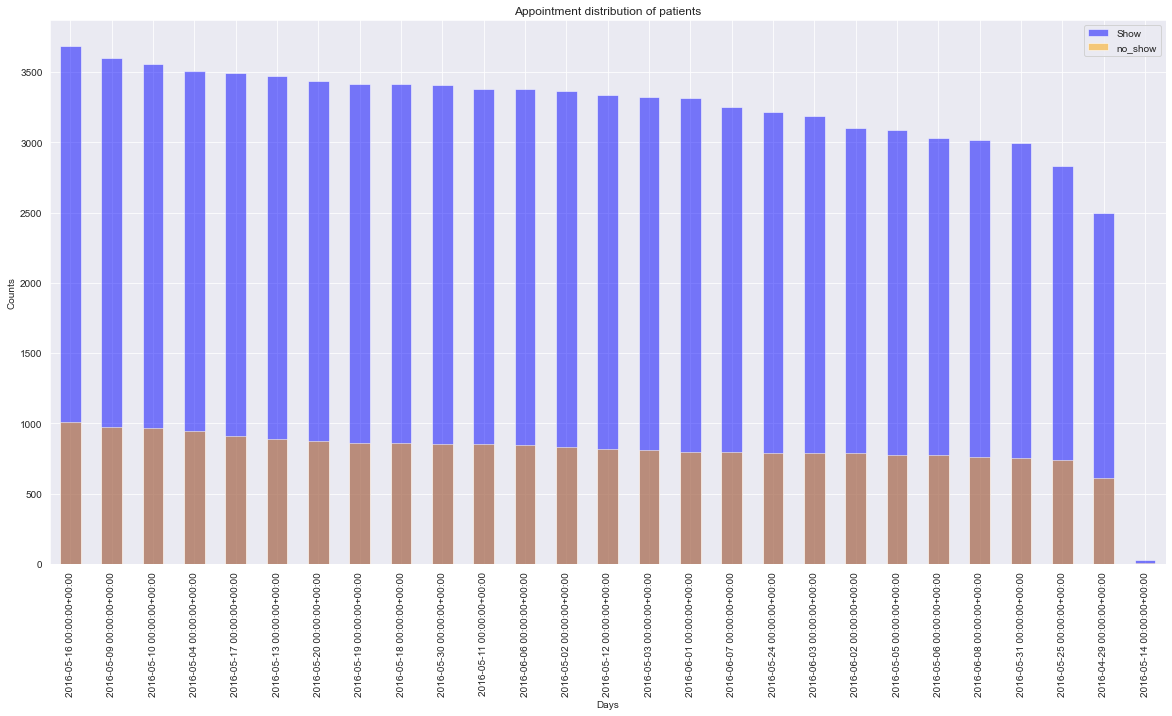

In [210]:
# Let's call the function to plot the chart

my_function()

#Chart title and axes

plt.title('Appointment distribution of patients')

plt.xlabel('Days')

plt.ylabel('Counts')

#To describe the parts of the chart
plt.legend();

> There seems to be the most appointment in May and April has the least appointment.

### Research question 7 ( Does SMS received have effect on patient that Showed for their appointment? )

>  Let's see if patient received notification on their appointment day whether it will influence them showing for their appointment. 

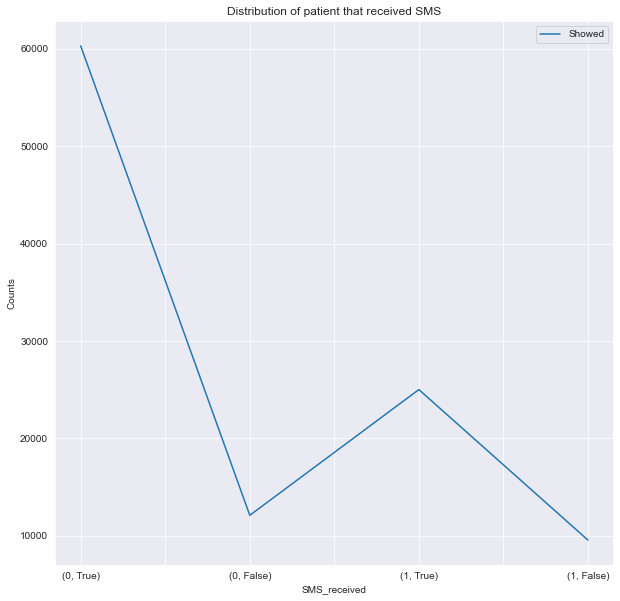

In [62]:
#Let's see whether SMS have effect on patients showing up for their appointment

#Let's define another function df_sms to grouped patient that showed up according to sms received

df_sms = df.groupby('SMS_received').Showed.value_counts()

#Let's plot a lineplot for the function df_sms

df_sms.plot(kind='line').legend()

#Let's set the figure size

plt.gcf().set_size_inches(10,10)

#Let's set the tile for our chart 

plt.title('Distribution of patient that received SMS')

plt.xlabel('SMS_received')

plt.ylabel('Counts');

>  The graph shows that SMS does not really have effect on whether patients will show up for their appointment. The difference between those that showed up after receiving sms and those that did not show up is quite small. 

<a id='conclusions'></a>
## Conclusions

> In this analysis, various factors that we can look into inorder to predict whether patients will show up for their appointment were looked into and the following results were obtained:

<ul>
<li> The maximum appointments are for infants. There is a drop and then a spike at around the age of 50. Finally, as the age progresses less and less people set up appointments.</li>
    
<li> The neighborhood data varied alot. Jardim Camburi has very high number of appointments while there are some neighborhoods that have less than 10 appointments.</li>
    
    
<li>More females tends to showed up for their appointment compared to males.</li>
    

<li>Patients tends to show up for their appointment mostly in May compared to April and June, few people showed up in April.</li>
    

    
</ul>

### Limitation
 <ol>
<li> SMS does not have effect on whether patients will show up for their appointment, according to the analysis, patients that does not receive sms tends to show up more for their appointment that those that received sms.</li>
    

<li>Scholarship does not have effect on whether patients will show up for their appointment, patients without scholarship showed up more compared to those that were on scholarship.</li>    

</ol>

In [195]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Project one'])

0